### Lab 2 - Classification
Matthew Alisangco, Jed Hughes, Chris Dong

## Read data

In [1]:
#  read_table "ISO-8859-1'"
import numpy as np
import pandas as pd

#tweets = pd.read_table('Lab1/clinton_trump_tweets.txt')
#Name, ScreenName, UserID, FollowersCount, FriendsCount, Location, Description, CreatedAt, StatusID, Language, Place, RetweetCount, FavoriteCount, Text

user_cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount', 'Text']
tweets = pd.read_table('clinton_trump_tweets.txt', encoding ="ISO-8859-1", dtype=str, names= user_cols)

tweets.head(10)

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Unco...,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,null,0,1,@NWAJimmy I've read it now though brother. Was...
1,Cookie,Cookiemuffen,109945090,2154,2034,The American South,Got married after college. I don't regret star...,Wed Oct 26 18:44:08 EEST 2016,791304413923213312,en,null,1937,0,RT @wikileaks: New poll puts Pirate Party on c...
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, try...",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,null,0,0,@gaystoner821 I think New Orleans spoiled me w...
3,Mark Hager,marksnark,167177185,204,448,Pittsburgh,"Hip, trendy, smart, funny, fit, lobbyist. U? B...",Wed Oct 26 00:33:20 EEST 2016,791029904733331457,en,null,891,0,RT @LOLGOP: ACA needs fixes but know da facts:...
4,Capitalist Creations,aaronjhoddinott,1191022351,775,154,Canada,"Entrepreneur, startup investor, political junk...",Fri Oct 28 05:05:10 EEST 2016,791823089700962304,en,null,7,0,RT @FastCompany: Alphabet shares soar on bette...
5,Josh,BigPapiCarnivor,154393802,646,2985,NaN,"Embrace the feel, induce the euphoria, and jus...",Sat Oct 29 02:34:44 EEST 2016,792147620986839040,en,null,51,0,RT @Pattric: That one follower who tweet you e...
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bo...,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,null,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell mi...
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,null,0,0,Hacked e-mails show Clinton campaigns fears ab...
8,Brianna N. Love,Brianna__Loves,17352518,803,1280,#thesea,green blogger|Swells'19 architecture and geosc...,Fri Oct 28 07:32:18 EEST 2016,791860117671124992,en,null,24,0,RT @africaarguments: This year's seen some rem...
9,Polly Ticks,PTicks,2352007196,1422,863,everywhere and nowhere,"a girl interested in the political world, like...",Fri Oct 28 19:01:13 EEST 2016,792033486970454020,en,null,3,0,"RT @HalifaxEditor: Some 40 years later, @HfxRe..."


## Clean data
Remove all Retweets, Remove all users that have Less than 20 tweets

In [9]:
tweetsNoRT = tweets[~tweets.Text.str.startswith('RT')]

tweetsNoRT.head()
#Comments -> {Classifier} -> positive or negative?

#tweetsNoRT[UserID.isin(ids[UserID.duplicated()])].sort("UserID")
#Groupby usersid with tweets('texts') > 20"        
df_userids_largetweets = pd.concat(g for _, g in tweetsNoRT.groupby("UserID") if len(g) > 19)

#type(df_userids_largetweets)
#df_userids_largetweets.head()
#print(df_userids_largetweets['UserID'].unique())



In [3]:
type(df_userids_largetweets)
#print(df_userids_largetweets.head())

pandas.core.frame.DataFrame

In [13]:
df_userids_largetweets = pd.concat(g for _, g in tweetsNoRT.groupby("UserID") if len(g) > 49)
handle = '(@[a-zA-z0-9]+)'
hashtag = '(#[a-zA-z0-9]+)'
hashHandle = r'((@|#)([a-zA-Z0-9]+))'

df_tweets = pd.DataFrame()

df_tweets['UserID'] = df_userids_largetweets.UserID
df_userids_largetweets['Handles'] = df_userids_largetweets['Text'].str.findall(handle).apply(' '.join)
df_userids_largetweets['Hashtags'] = df_userids_largetweets['Text'].str.findall(hashtag).apply(' '.join)

df_tweets['Hashtags_Handles'] = df_userids_largetweets['Hashtags'] + df_userids_largetweets['Handles']

df_tweets

,UserID,Hashtags_Handles
33447,100007440,@Johnubacon @seangriffey
36274,100007440,@jbouie
114806,100007440,@MotherJones
198965,100007440,@nycsouthpaw
441505,100007440,@anamariecox
489842,100007440,@herdyshepherd1 @kathrynaalto
755406,100007440,@ElectricLit @The_Millions @nickripatrazone
792459,100007440,@onlxn
908163,100007440,@iamsteranko
1047028,100007440,@pronounced_ing


In [14]:
df_tweets = df_tweets.groupby('UserID').agg({'Hashtags_Handles': lambda x: ' '.join(x)})
df_tweets = df_tweets[df_tweets['Hashtags_Handles'].str.len() > 49]

df_tweets

,Hashtags_Handles
UserID,
100007440,@Johnubacon @seangriffey @jbouie @MotherJones ...
1000336892,@MikeMarchant ...
100132110,#technology #smallsat@santoshsinha30 @shub...
1001519173,@politico @ericbolling @EricTrump @FoxNews @IM...
1001992369,@YouTube @YouTube @Fenixxmag @YouTube @Y...
100201791,#TheDogsOfProtest @Mashwani001 @bk253 @Iftikha...
1002372391,#tech #news #tech #news #tech #news #tech #new...
100270267,@JoeTurner212 @realDonaldTrump @HoustonChro...
1002737852,@MiniBusFC @i__dont__care @MiniBusFC @theMUFCb...


In [15]:
import sklearn.feature_extraction.text as sk_text

Text_Vect = df_tweets['Hashtags_Handles'];

vectorizer = sk_text.CountVectorizer(min_df=1, max_features = 50)
#vectorizer = sk_text.CountVectorizer(min_df=1, stop_words = 'english')

Text_matrix = vectorizer.fit_transform(Text_Vect)

#  convert it to numpy array

#print(vectorizer.get_feature_names())

df_text = pd.DataFrame(Text_matrix.todense(), index=Text_Vect.index, columns=vectorizer.get_feature_names())

#df_hash["Hashtag_Count"] = df_hash.sum(axis = 1)

In [16]:
df_text['UserID'] = df_text.index
df_text 

,abc,album,armedradio,armedradio1,breitbartnews,business,clinton,cnn,cosproject,crookedhillary,...,spotify,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube,UserID
UserID,,,,,,,,,,,,,,,,,,,,,
100007440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100007440
1000336892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000336892
100132110,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100132110
1001519173,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1001519173
1001992369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,73,1001992369
100201791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100201791
1002372391,0,0,0,0,0,0,0,0,0,0,...,0,0,289,0,0,0,0,0,0,1002372391
100270267,1,0,0,0,0,0,1,1,0,0,...,0,8,0,0,0,4,0,0,0,100270267
1002737852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1002737852


In [17]:
ground_cols = ['UserID', 'team']
ground_truth = pd.read_table('clinton_trump_user_classes.txt', encoding ="ISO-8859-1", dtype=str, names= ground_cols)

df_text = pd.merge(df_text, ground_truth, on = 'UserID')
df_text

,abc,album,armedradio,armedradio1,breitbartnews,business,clinton,cnn,cosproject,crookedhillary,...,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube,UserID,team
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100007440,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1000336892,0
2,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,100132110,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1001519173,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,73,1001992369,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100201791,0
6,0,0,0,0,0,0,0,0,0,0,...,0,289,0,0,0,0,0,0,1002372391,0
7,1,0,0,0,0,0,1,1,0,0,...,8,0,0,0,4,0,0,0,100270267,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1002737852,0
9,2,0,0,0,6,0,0,1,0,0,...,0,0,1,2,14,0,0,1,100274749,0


In [18]:
test_data = df_text

test_data = test_data.drop(['UserID'], axis = 1)
test_data = test_data.drop(['team'], axis = 1)

test_data

,abc,album,armedradio,armedradio1,breitbartnews,business,clinton,cnn,cosproject,crookedhillary,...,seanhannity,spotify,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,289,0,0,0,0,0,0
7,1,0,0,0,0,0,1,1,0,0,...,0,0,8,0,0,0,4,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,6,0,0,1,0,0,...,1,0,0,0,1,2,14,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X = test_data
y = df_text['team'] 

print(X.shape)
print(y.shape)

(9332, 50)
(9332,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7465, 50)
(1867, 50)
(7465,)
(1867,)


In [23]:
from sklearn import tree
from sklearn import metrics

dtree = tree.DecisionTreeClassifier()

dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

#y_prob = dtree.predict_proba(X_test)


print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))   

[[397 510]
 [199 761]]
0.631468076447
0.620246384574
0.607425879378


In [24]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)


y_pred = svm_clf.predict(X_test)


print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))          # Parameter "average" is requred if not a binary model

[[383 524]
 [167 793]]
0.64790724181
0.629887520086
0.61355838357


In [25]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

#probs = lr_clf.predict_proba(X_test)


print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))          # Parameter "average" is requred if not a binary model

[[335 572]
 [ 70 890]]
0.714857789321
0.656132833423
0.625983380466


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 50))

param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(n_neighbors=1)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')
grid.fit(X, y)
means = grid.cv_results_['mean_test_score']

for mean, params in zip(means, grid.cv_results_['params']):
    print(mean, params)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.528725390777 {'n_neighbors': 1}
0.473614375422 {'n_neighbors': 2}
0.52914239008 {'n_neighbors': 3}
0.504335563564 {'n_neighbors': 4}
0.531227005678 {'n_neighbors': 5}
0.51560067258 {'n_neighbors': 6}
0.539369643899 {'n_neighbors': 7}
0.522077032038 {'n_neighbors': 8}
0.533342841221 {'n_neighbors': 9}
0.521331573454 {'n_neighbors': 10}
0.534033022431 {'n_neighbors': 11}
0.524874042179 {'n_neighbors': 12}
0.534172618772 {'n_neighbors': 13}
0.527760638314 {'n_neighbors': 14}
0.537569592838 {'n_neighbors': 15}
0.531417681559 {'n_neighbors': 16}
0.540332338584 {'n_neighbors': 17}
0.533926201027 {'n_neighbors': 18}
0.542987187517 {'n_neighbors': 19}
0.532058642253 {'n_neighbors': 20}
0.544085747494 {'n_neighbors': 21}
0.534652493085 {'n_neighbors': 22}
0.548580216797 {'n_neighbors': 23}
0.538402326452 {'n_neighbors': 24}
0.551923906698 {'n_neighbors': 25}
0.541843569199 {'n_neighbors': 26}
0.547561393798 {'n_neighbors': 27}
0.539421863173 {'n_neighbors': 28}
0.552796101384 {'n_neighbors': 

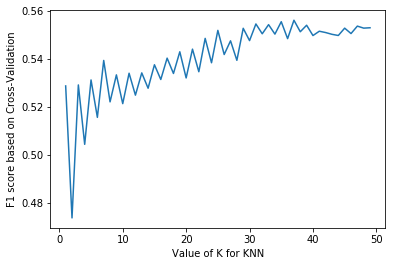

In [26]:
plt.plot(k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Cross-Validation')
plt.show()